In [1]:
import sys, pdb
from importlib import reload
from astropy import units as un, constants as cons
from astropy.cosmology import Planck15 as cosmo
import numpy as np
from numpy import log10 as log
sys.path.append('../pysrc/')
import GIZMO_ICs as ics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
nH=0.003*un.cm**-3
rho = nH*cons.m_p.to('g') / 0.7
print(rho)
m_p = 1e3*un.Msun
((m_p/(4*np.pi*rho/3))**(1/3)).to('kpc')

7.168379672957143e-27 g / cm3


<Quantity 0.13111374 kpc>

In [4]:
import pylab as pl
import matplotlib
import my_utils as u
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rc('font', family='serif', size=10)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True
fig_width_half = 3.4
figdir = '/Users/jonathanstern/Dropbox/github_repositories/gizmo_analysis/figures/'

## steps
* choose grid parameters below
* MakeDisk
    * change parameters (e.g. resolution) in ../MakeDisk_wHalo_m11_lr/main.c
    * compile with make
    * run ./MakeHubbleType ICs/m11_no_halo_#vc#_res#2e4#_fgas#05#.ic or
    * ./MakeHubbleType ICs/m11_no_halo_#vc#_res#2e4#_fgas#05#_Rcirc#1#.ic if Rcirc!=10
* create output files using script below

### first grid run (July 2021)

In [3]:
vcs = np.array([100,150])*un.km/un.s
Rsonics = np.array([0.3,3,30])*un.kpc
Zs = np.array([0.3,3.])
Rcircs = np.array([1,10])*un.kpc

for vc in vcs[:]:    
    for i,Rsonic in enumerate(Rsonics):
        for base_Z in Zs:
            Z = base_Z*Rsonics[i]/Rsonics[1] # to keep Mdot roughly equal
            base_instance = ics.ICs(vc,Rcircs[0],Rsonic,Z)
            print('v_c=%d, R_sonic=%.1f, Z=%.2f'%(vc.value,Rsonic.value,Z),end=',')
            base_instance.calc_CF_solution(pr=False)
            if base_instance.CF_solution!=None:
                log_nH = log(base_instance.CF_solution.nHs()[base_instance.CF_solution.Rs()>Rcircs[1]][0].value)
                print(' log nH(10 kpc)=%.2f, Mdot=%.3f'%(log_nH,base_instance.CF_solution.Mdot.value))
                for Rcirc in Rcircs[:]:
                    print('R_circ=%d kpc'%Rcirc.value,end=',')
                    instance = ics.ICs(ics=base_instance)
                    instance.Rcirc = Rcirc
                    instance.create_output_files()
            print('')

v_c=100, R_sonic=0.3, Z=0.03, log nH(10 kpc)=-3.09, Mdot=0.535
R_circ=1 kpc, r(t_cool=10Gyr) = 61 kpc, r(t_sc=20Gyr) = 1781 kpc
Part0 num=155722, w/o CGM=25000, |<r>|=1.3 , |<v>|=0.2 , <j>=-0.1 -1.3 189.4,Ms: 8e+04 8e+04 1.6e+05... 8.2e+07
Part2 num=125000, |<r>|=0.0 , |<v>|=0.3 , <j>=0.1 -0.0 656.8,Ms: 8e+04
Part3 num=25000, |<r>|=0.1 , |<v>|=0.7 , <j>=-5.9 -1.6 -0.3,Ms: 8e+04
Part5 num=1, |<r>|=0.0 , |<v>|=0.0 , <j>=0.0 0.0 0.0,Ms: 2e+08
R_circ=10 kpc, r(t_cool=10Gyr) = 61 kpc, r(t_sc=20Gyr) = 1781 kpc
Part0 num=155722, w/o CGM=25000, |<r>|=1.2 , |<v>|=0.2 , <j>=-0.5 -5.1 927.6,Ms: 8e+04 8e+04 1.6e+05... 8.2e+07
Part2 num=125000, |<r>|=0.0 , |<v>|=0.3 , <j>=0.1 -0.0 656.8,Ms: 8e+04
Part3 num=25000, |<r>|=0.1 , |<v>|=0.7 , <j>=-5.9 -1.6 -0.3,Ms: 8e+04
Part5 num=1, |<r>|=0.0 , |<v>|=0.0 , <j>=0.0 0.0 0.0,Ms: 2e+08

v_c=100, R_sonic=0.3, Z=0.30, log nH(10 kpc)=-3.75, Mdot=0.110
R_circ=1 kpc, r(t_cool=10Gyr) = 55 kpc, r(t_sc=20Gyr) = 1730 kpc
Part0 num=55191, w/o CGM=25000, |<r>|=0.8 , |

v_c=150, R_sonic=30.0, Z=30.00,no result reached maximum R, try rerunning with return_all_results=True and check intermediate solutions



### second grid run (Oct 1st 2021)

In [ ]:
vcs = np.array([75,100,150])*un.km/un.s
Rsonics = np.array([100,300])*un.kpc
Zs = np.array([1.,3.])
Rcircs = np.array([10])*un.kpc
for vc in vcs[:]:    
    for Rsonic in Rsonics[:]:
        for Z in Zs[:]:
            base_instance = ics.ICs(vc,Rcircs[0],Rsonic,Z)
            print('v_c=%d, R_sonic=%.1f, Z=%.2f'%(vc.value,Rsonic.value,Z),end=',')
            base_instance.calc_CF_solution(pr=True)
            if base_instance.CF_solution!=None:
                log_nH = log(base_instance.CF_solution.nHs()[base_instance.CF_solution.Rs()>Rcircs[0]][0].value)
                print(' log nH(10 kpc)=%.2f, Mdot=%.3f'%(log_nH,base_instance.CF_solution.Mdot.value))
                for Rcirc in Rcircs[:]:
                    print('R_circ=%d kpc'%Rcirc.value,end=',')
                    instance = ics.ICs(ics=base_instance)
                    instance.Rcirc = Rcirc
                    instance.create_output_files()
            print('')            

#### only the following succeed:
* vc75_Rs100_Mdot4339_Rcirc10
* vc75_Rs300_Mdot19036_Rcirc10
* vc100_Rs100_Mdot7107_Rcirc10
* vc100_Rs300_Mdot27474_Rcirc10
* vc100_Rs100_Mdot15755_Rcirc10
* vc150_Rs100_Mdot31948_Rcirc10

### with and without CGM, with fgas_disk=0.2-0.5. similar to vc150_Rs0_Mdot745_Rcirc10

In [3]:
ics.ICs.R_max=4000*un.kpc
vc = 150*un.km/un.s
Rsonics = np.array([0.3,0.00003])[:]*un.kpc
Z = 0.3
Rcirc = 10*un.kpc
resolution = 2e4*un.Msun #1e3*un.Msun #
instances = [None]*len(Rsonics)
for fgas in (0.2,0.3,0.4,0.5)[:1]:
    for i,Rsonic in enumerate(Rsonics):
        instance = instances[i] = ics.ICs(vc,Rcirc,Rsonic,Z,fgas=fgas,resolution = resolution)
        print('v_c=%d, R_sonic=%.1f, Z=%.2f, f_gas=%.1f'%(vc.value,Rsonic.value,Z,fgas))
        instance.calc_CF_solution(pr=True,tol=1e-8)
        if instance.CF_solution!=None:
            log_nH = log(instance.CF_solution.nHs()[instance.CF_solution.Rs()>Rcirc][0].value)
            print(' log nH(10 kpc)=%.2f, Mdot=%.3f'%(log_nH,instance.CF_solution.Mdot.value))
            instance.create_output_files()
        print('')

v_c=150, R_sonic=0.3, Z=0.30, f_gas=0.2
Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=10 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.250008;  maximum r=3 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.125009;  maximum r=30 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.187508;  maximum r=168 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.218758;  maximum r=15 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.203133;  maximum r=153 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.195321;  maximum r=406 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.199227;  maximum r=3525 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.197274;  maximum r=683 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.198250;  maximum r=1157

# plot ICs

In [10]:
import h5py, scipy, scipy.stats, pylab as pl
from astropy import units as un, constants as cons
%matplotlib inline
# instance = instances[0]
instance = fiducial #for Nadav's sims
init_snapshot_fn = instance.outdirname()+'/init_snapshot.hdf5'
init_snapshot = h5py.File(init_snapshot_fn,'r')

In [11]:
# disk only gas
snap = ics.gsr.Snapshot(instance.makedisk_filename())
coords = snap.SnapshotData['pos'][0]
energies = snap.SnapshotData['energies']
inds = (coords[:,1]<25) & (coords[:,1]>-25)
Xs = coords[:,0][inds]
Ys = coords[:,2][inds]
# vals = None #for counting stars
vals = energies[inds] * (un.km**2/un.s**2 * cons.m_p / cons.k_B).to('K').value * (2./3* 0.62) 

In [12]:
# all gas
coords = init_snapshot['PartType0']['Coordinates']
vels = init_snapshot['PartType0']['Velocities']
inds = (coords[:,1]<5) & (coords[:,1]>-5)
Xs = coords[:,0][inds]
Zs = coords[:,2][inds]
# vals = None #for counting stars
# vals = init_snapshot['PartType0']['InternalEnergy'][inds] * (un.km**2/un.s**2 * cons.m_p / cons.k_B).to('K').value * (2./3* 0.62) 
phis = np.arctan2(vels[:,1][inds],vels[:,0][inds])

In [13]:
bins = (np.arange(-50,50,5),np.arange(-50,50,5))
m,x,y,_ = scipy.stats.binned_statistic_2d(Xs,
                                         Zs,
                                         vels[:,1][inds],
                                         statistic='median',
                                         bins=bins)
x = (x[1:]+x[:-1])/2; y = (y[1:]+y[:-1])/2; 

Text(0.5, 1.0, 'all gas')

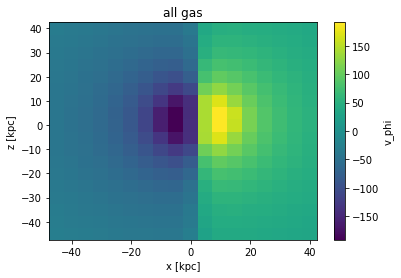

In [14]:
pl.pcolormesh(x,y,m.T)
pl.colorbar(label = 'v_phi')
pl.xlabel('x [kpc]'); pl.ylabel('z [kpc]')
pl.title('all gas')
# pl.savefig(KY_path+'../figures/ICs_allgas_vphi.pdf')

In [44]:
np.sin(np.arccos(np.random.random_sample(5) * 2 - 1))

array([0.09798695, 0.75389211, 0.99910938, 0.46913977, 0.96567298])

Text(0.5, 1.0, 'all gas')

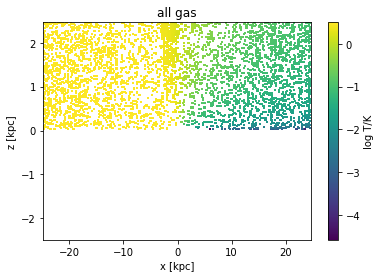

In [32]:
pl.pcolormesh(x,y,m.T)
pl.colorbar(label = 'log T/K')
pl.xlabel('x [kpc]'); pl.ylabel('z [kpc]')
pl.title('all gas')
# pl.savefig(KY_path+'../figures/ICs_allgas_temperature.pdf')

In [25]:
bins = (np.arange(-25,25,0.25),np.arange(-2.5,2.5,0.025))
m,x,y,_ = scipy.stats.binned_statistic_2d(Xs,
                                         Ys,
                                         None,
                                         statistic='count',
                                         bins=bins)
x = (x[1:]+x[:-1])/2; y = (y[1:]+y[:-1])/2; 

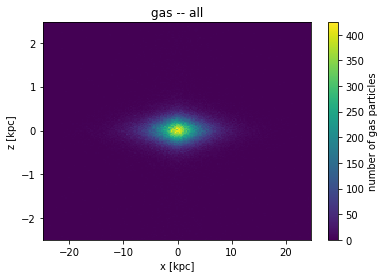

In [26]:
pl.pcolormesh(x,y,m.T)
pl.colorbar(label = 'number of gas particles')
pl.xlabel('x [kpc]'); pl.ylabel('z [kpc]')
pl.title('gas -- disk only')
pl.savefig(KY_path+'../figures/ICs_gas_temperature.pdf')

In [19]:
coords = init_snapshot['PartType2']['Coordinates']
inds = (coords[:,1]<25) & (coords[:,1]>-25)
Xs = coords[:,0][inds]
Ys = coords[:,2][inds]

In [20]:
bins = (np.arange(-25,25,0.25),np.arange(-2.5,2.5,0.025))
m,x,y,_ = scipy.stats.binned_statistic_2d(Xs,
                                         Ys,
                                         None,
                                         statistic='count',
                                         bins=bins)
x = (x[1:]+x[:-1])/2; y = (y[1:]+y[:-1])/2; 

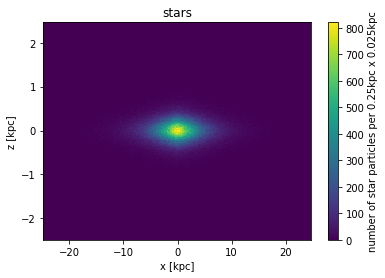

In [22]:
pl.pcolormesh(x,y,m.T)
pl.colorbar(label = 'number of star particles per 0.25kpc x 0.025kpc')
pl.xlabel('x [kpc]'); pl.ylabel('z [kpc]')
pl.title('stars')
pl.savefig(KY_path+'../figures/stellar_locations.pdf')

In [12]:
for i in range(5):
    print(init_snapshot['PartType%d'%i]['Coordinates'].shape)

(250037, 3)
(0, 3)
(500000, 3)
(10000, 3)
(0, 3)


In [ ]:
import FIRE_files as ff
import first_pass as l
logT_projected = l.SnapshotProjection(snapshot, log(snapshot.Ts()),
     edge_on=True,r_max=100,width=100,
    fn='%s_%d_T_edge_on'%(sim,iSnapshot))
res = logT_projected.project()
label = r'temperature $[{\rm K}]$'
cmap = 'RdBu_r'; cbar_range = 1e3,1e6; ticks = [1e3,1e4,1e5,1e6]; ticklabels = [r'$10^3$',r'$10^4$',r'$10^5$',r'$10^6$']
pl.pcolormesh(res[0],res[0],10.**res[2].T,vmin=cbar_range[0],vmax=cbar_range[1],cmap=cmap,
              norm=matplotlib.colors.LogNorm(*cbar_range))



In [ ]:
self = base_instance
ics.Rmax=4000*un.kpc
ics.CF.shoot_from_sonic_point(self.potential,
                                        self.cooling,
                                        self.Rsonic,
                                        self.R_max,self.R_min,max_step=self.max_step,
                                        pr=True,return_all_results=True)

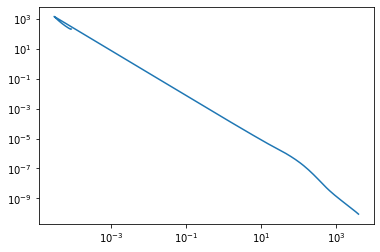

In [6]:
import pylab as pl
pl.loglog(instance.CF_solution.Rs(),instance.CF_solution.nHs())
pl.ion()

### MHD calculation 'MHD_subsonic_no_feedback12'

In [3]:
Rcircs = np.array([1])*un.kpc
Rsonics = np.array([0.1])*un.kpc
vcs = np.array([200])*un.km/un.s
Zs = np.array([1])
smallGalaxy = True
resolution = 2e4
#for constant Rsonic, Rcool scales as v_c^{2/3} Z^0
ics.ICs.R_min = 0.03*un.kpc
for vc in vcs[:]:    
    for Rsonic in Rsonics[:]:
        for Z in Zs[:]:
            base_instance = ics.ICs(vc,Rcircs[0],Rsonic,Z,smallGalaxy=smallGalaxy,resolution=resolution)
            print('v_c=%d, R_sonic=%.1f, Z=%.2f'%(vc.value,Rsonic.value,Z),end=',')
            base_instance.calc_CF_solution(pr=False)
            if base_instance.CF_solution!=None:
                log_nH = log(base_instance.CF_solution.nHs()[base_instance.CF_solution.Rs()>Rcircs[0]][0].value)
                print(' log nH(Rcirc)=%.2f, Mdot=%.3f'%(log_nH,base_instance.CF_solution.Mdot.value))
                for Rcirc in Rcircs[:]:
                    print('R_circ=%d kpc'%Rcirc.value,end=',')
                    instance = ics.ICs(ics=base_instance)
                    instance.Rcirc = Rcirc
                    instance.create_output_files(Rres2Rcool=2)
            print('')            

v_c=200, R_sonic=0.1, Z=1.00, log nH(Rcirc)=-1.79, Mdot=0.346
R_circ=1 kpc, 2r(t_cool=10Gyr) = 119 kpc, r(t_sc=20Gyr) = 3160 kpc
Part0 num=533280, w/o CGM=1000, |<r>|=0.3, |<v>|=0.0, <j>=-0.0 0.0 199.7,Ms: 2e+04 2e+04 6e+04... 1.2e+09
Part2 num=5000, |<r>|=0.0, |<v>|=3.2, <j>=-0.0 -0.1 101.9,Ms: 2e+04
Part3 num=1000, |<r>|=0.1, |<v>|=2.2, <j>=-3.5 7.0 11.7,Ms: 2e+04
Part5 num=1, |<r>|=0.0, |<v>|=0.0, <j>=0.0 0.0 0.0,Ms: 2e+06



In [4]:
Rcirc = Rcirc
(4*np.pi*Rcirc**3 / 3. * 10**log_nH *un.cm**-3 * cons.m_p).to('Msun') / (resolution*un.Msun)

<Quantity 84.54576202>

### for Nadav's cooling flow calculations

In [5]:
reload(ics)

<module 'GIZMO_ICs' from '/Users/jonathanstern/Dropbox/github_repositories/cooling_flow/ipynb/../pysrc/GIZMO_ICs.py'>

In [6]:
fiducial = ics.ICs(vc=200*un.km/un.s,
                   Rcirc=10*un.kpc,
                    Rsonic=0.2*un.kpc,
                   resolution = 1e3*un.Msun,
                    Z_CGM=0.1,fgas=0.2)

In [7]:
fiducial.calc_CF_solution(pr=True)
ind = (fiducial.CF_solution.Rs()>10*un.kpc).nonzero()[0][0]
log_nH = log(fiducial.CF_solution.nHs()[ind].value)
print('log nH(10 kpc)=%.2f, Mdot=%.3f'%(log_nH,fiducial.CF_solution.Mdot.value))

Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=4 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.250008;  maximum r=2 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.125009;  maximum r=21 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.187508;  maximum r=156 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.156258;  maximum r=57 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.171883;  maximum r=170 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.179696;  maximum r=839 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.183602;  maximum r=725 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.181649;  maximum r=8813 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.182625;  maximum r=1606 kpc; stop reason: sonic point
Integrated wit

In [8]:
fiducial.create_output_files()

files saved to: /Users/jonathanstern/Dropbox/jonathanmain/CGM/KY_sims/ICs/vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e3
../MakeDisk_wHalo_m11_lr/ICs/m11_no_halo_200_res1e3_fgas02.ic
 2r(t_cool=10Gyr) = 167 kpc, r(t_sc=20Gyr) = 3248 kpc
Part0 num=145558020, w/o CGM=200000, |<r>|=0.0, |<v>|=0.0, <j>=0.1 -0.0 1329.3,max gas id: 145558019
Ms: 1e+03 1e+03 3e+03... 2e+07
Part2 num=1000000, |<r>|=0.0, |<v>|=0.2, <j>=0.0 0.0 1007.5,Ms: 1e+03
Part3 num=200000, |<r>|=0.0, |<v>|=0.4, <j>=-0.2 0.2 0.2,Ms: 1e+03
Part5 num=1, |<r>|=0.0, |<v>|=0.0, <j>=0.0 0.0 0.0,Ms: 2e+06


# turbulence tests

In [12]:
sols=sols[:-1]

In [19]:
# sols = []
for Rsonic,resolution,Z_CGM in ((3,1e4,3),(0.05,1e4,0.1),(20,1e4,20),(0.003,1e4,1e-3))[-1:]:
    fiducial = ics.ICs(vc=200*un.km/un.s,
                       Rcirc=1*un.kpc,
                       Rsonic=Rsonic*un.kpc,
                       resolution = resolution*un.Msun,
                       Z_CGM=Z_CGM,fgas=0.2)
    if Rsonic<0.02: fiducial.R_max=2000*un.kpc
    fiducial.calc_CF_solution(pr=True)
    ind = (fiducial.CF_solution.Rs()>10*un.kpc).nonzero()[0][0]
    log_nH = log(fiducial.CF_solution.nHs()[ind].value)
    print('log nH(10 kpc)=%.2f, Mdot=%.3f'%(log_nH,fiducial.CF_solution.Mdot.value))
    fiducial.create_output_files()
    sols.append( fiducial )


Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=0 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.250008;  maximum r=0 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.125009;  maximum r=0 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.187508;  maximum r=1 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.218758;  maximum r=0 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.203133;  maximum r=3 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.195321;  maximum r=2 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.199227;  maximum r=5 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.201180;  maximum r=28 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.202156;  maximum r=11 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 

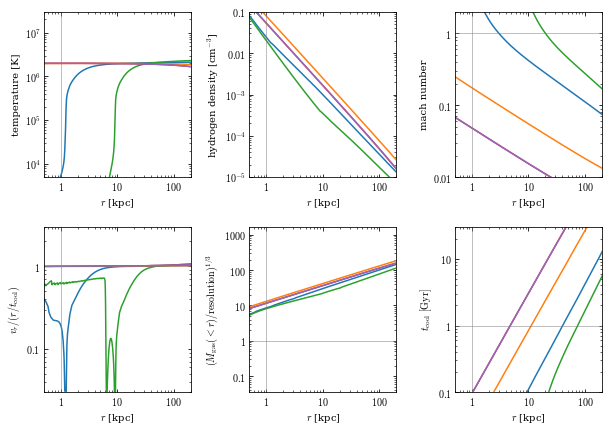

In [20]:
fig = pl.figure(figsize=(10,7))
pl.subplots_adjust(hspace=0.3,wspace=0.4)
for iPanel in range(6):
    ax = pl.subplot(2,3,iPanel+1)
    for sol in sols:
        res = sol.CF_solution
        if iPanel==0: ys = res.Ts()
        if iPanel==1: ys = res.nHs()
        if iPanel==2: ys = res.Ms()
        if iPanel==3: ys = res.t_cools() / res.t_flows()
        if iPanel==4: ys = (res.Mgas()/sol.resolution)**(1/3.)
        if iPanel==5: ys = res.t_cools() 
        pl.loglog(res.Rs(),ys)
    pl.xlim(0.5,200)
    pl.xlabel(r'$r$ [kpc]')
    pl.axvline(1.,c='.5',lw=0.5)
    ax.xaxis.set_major_formatter(u.arilogformatter)
    ax.yaxis.set_major_formatter(u.arilogformatter)
    if iPanel==0:
        pl.ylabel(r'temperature [K]')
        pl.ylim(0.5e4,3e7)
    if iPanel==1: 
        pl.ylabel(r'hydrogen density [cm$^{-3}$]')
        pl.ylim(1e-5,0.1)
    if iPanel==2: 
        pl.ylabel(r'mach number')
        pl.ylim(0.01,2)
        pl.axhline(1.,c='.5',lw=0.5)
    if iPanel==3: 
        pl.ylabel(r'$v_r / (r/t_{\rm cool})$')
        pl.ylim(0.03,3)
        pl.axhline(1.,c='.5',lw=0.5)
    if iPanel==4:
        pl.ylabel(r'$(M_{\rm gas}(<r) / {\rm resolution})^{1/3}$')
#         pl.ylim(0.03,3)
        pl.axhline(1.,c='.5',lw=0.5)
    if iPanel==5: 
        pl.ylabel(r'$t_{\rm cool}\ [{\rm Gyr}]$')
        pl.ylim(0.1,30)
        pl.axhline(1.,c='.5',lw=0.5)
pl.savefig(figdir+'ICs.pdf')

3.668139869118586 solMass / yr
1.2125321462030512 solMass / yr
4.536451441522723 solMass / yr


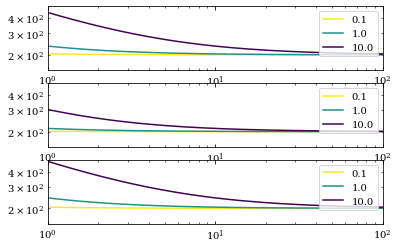

In [67]:
for iPanel,sol in enumerate(sols):
    Mdot = sol.CF_solution.Mdot
    print(Mdot)
    ax = pl.subplot(3,1,iPanel+1)
    for ii,t in enumerate(10.**np.arange(-1,2)*un.Gyr):
        c = pl.get_cmap('viridis')(1-ii/2)        
        pl.plot(res.Rs(), ((res.vc2() + cons.G*(t*Mdot).to('Msun')/res.Rs())**0.5).to('km/s'),c=c,label=t.value)
    pl.loglog()
    pl.xlim(1,100)
    pl.ylim(150,500)
    pl.legend()

In [43]:
(4*np.pi/3*2e-3*(10*un.kpc)**3*un.cm**-3 *cons.m_p / (1e4*un.Msun)).to('')

<Quantity 20704.37453136>

In [7]:
import h5py
f = h5py.File(fiducial.outdirname()+'/init_snapshot.hdf5')
f['PartType0']['ParticleIDs'][:].shape

(680522,)

### for MHD fast rotating cooling flow solution

In [132]:
reload(ics)
ics.ICs.R_min,ics.ICs.R_max = 0.005*un.kpc, 3000*un.kpc
fiducial = ics.ICs(vc=600*un.km/un.s,
                   Rcirc=10*un.kpc,
                   Rsonic=1*un.kpc,
                   resolution = 8e4*un.Msun,
                   Z_CGM=0.1,fgas=0.2,Rvc=50*un.kpc,m=0.3)

In [133]:
fiducial.calc_CF_solution(pr=True)
ind = (fiducial.CF_solution.Rs()>10*un.kpc).nonzero()[0][0]
log_nH = log(fiducial.CF_solution.nHs()[ind].value)
print('log nH(10 kpc)=%.2f, Mdot=%.3f'%(log_nH,fiducial.CF_solution.Mdot.value))

Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=3 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =0.500015;  maximum r=125 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =0.750012;  maximum r=16 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =0.625014;  maximum r=261 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =0.562514;  maximum r=297 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =0.593764;  maximum r=1202 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =0.609389;  maximum r=722 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =0.601576;  maximum r=1822 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =0.597670;  maximum r=2999 kpc; stop reason: max R reached
Inward integration of supersonic part reached r = 0.532 kpc
log nH(10 kpc)=-1.01, Mdot=202.674


In [135]:
res = fiducial.CF_solution
tHubble = 3*un.Gyr
Rcool = res.Rcool(tHubble)
Rcool_ind = np.searchsorted(res.Rs(),Rcool)
dRs = np.pad(res.Rs()[2:]-res.Rs()[:-2],1,mode='constant')
dts = (dRs/(2*res.vs())).to('Myr')
tffs = (res.Rs()/res.vc2()**0.5).to('Myr')
trots = (res.Rs()**2/(res.vc2()**0.5*fiducial.Rcirc)).to('Myr')
dphis = dts / trots
beta_enhancements_only_inflow = np.pad((res.Rs().value[:-1]**-2.5/res.Rs().value[1:]**-2.5)[::-1].cumprod()[::-1],(0,1),mode='constant')
beta_enhancements = np.pad((res.Rs().value[:-1]**-2.5*np.e**dphis[:-1]/res.Rs().value[1:]**-2.5)[::-1].cumprod()[::-1],(0,1),mode='constant')

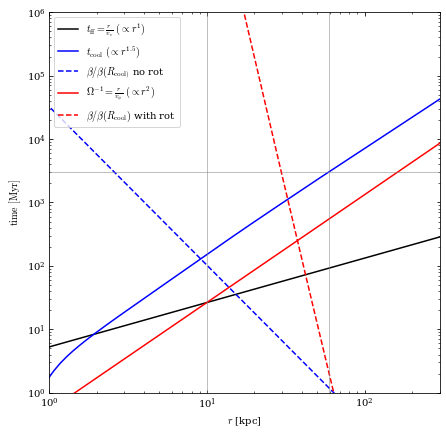

In [136]:
fig = pl.figure(figsize=(7,7))
ax = pl.subplot(111)
xs = res.Rs()
pl.plot(xs,tffs,label=r'$t_{\rm ff} = \frac{r}{v_{\rm c}}\ (\propto r^{1})$',c='k')
pl.plot(xs,res.t_cools().to('Myr'),label=r'$t_{\rm cool}\ (\propto r^{1.5})$',c='b')
# pl.plot(xs,(res.Rs()/Rcool)**-2.5,label=r'$\beta$ enhancement no rotation',c='b',ls=':')
pl.plot(xs,beta_enhancements_only_inflow/beta_enhancements_only_inflow[Rcool_ind],label=r'$\beta/\beta(R_{\rm cool)}$ no rot',c='b',ls='--')
pl.plot(xs,trots,label=r'$\Omega^{-1} = \frac{r}{v_\phi}\ (\propto r^{2})$',c='r')
pl.plot(xs,beta_enhancements/beta_enhancements[Rcool_ind],label=r'$\beta/\beta(R_{\rm cool})$ with rot',c='r',ls='--')
pl.loglog()
pl.xlim(1,300)
pl.ylim(1,1e6)
pl.xlabel(r'$r$ [kpc]')
pl.ylabel(r'${\rm time}\ [{\rm Myr}]$')
pl.legend(loc='upper left')
pl.axvline(fiducial.Rcirc.value,c='.5',lw=0.5)
pl.axvline(Rcool.value,c='.5',lw=0.5)
pl.axhline(tHubble.to('Myr').value,c='.5',lw=0.5)

In [141]:
(((cons.G*1*un.Msun/(7e5*un.km))**0.5).to('km/s').value/200)**2 * 2e6*un.K

<Quantity 9479460. K>

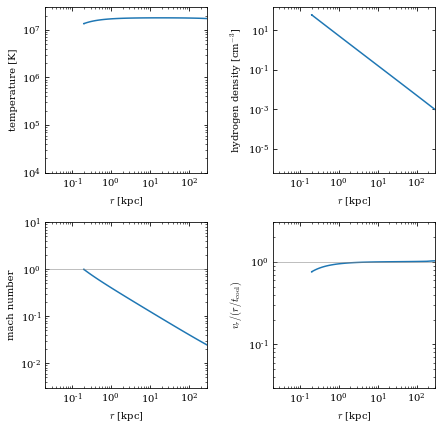

In [19]:
res = fiducial.CF_solution
fig = pl.figure(figsize=(7,7))
pl.subplots_adjust(hspace=0.3,wspace=0.4)
for iPanel in range(4):
    pl.subplot(2,2,iPanel+1)
    if iPanel==0: ys = res.Ts()
    if iPanel==1: ys = res.nHs()
    if iPanel==2: ys = res.Ms()
    if iPanel==3: ys = res.t_cools() / res.t_flows()
    pl.loglog(res.Rs(),ys)
    pl.xlim(0.02,300)
    pl.xlabel(r'$r$ [kpc]')
    if iPanel==0:
        pl.ylabel(r'temperature [K]')
        pl.ylim(1e4,3e7)
    if iPanel==1: 
        pl.ylabel(r'hydrogen density [cm$^{-3}$]')
#         pl.ylim(0.5e-5,10)
    if iPanel==2: 
        pl.ylabel(r'mach number')
        pl.ylim(0.003,10)
        pl.axhline(1.,c='.5',lw=0.5)
    if iPanel==3: 
        pl.ylabel(r'$v_r / (r/t_{\rm cool})$')
        pl.ylim(0.03,3)
        pl.axhline(1.,c='.5',lw=0.5)

In [5]:
fiducial.CF_solution.tcool_to_tff()[ind].to(''), fiducial.CF_solution.Ts()[ind], fiducial.CF_solution.Ms()[ind]

(<Quantity 6.20716144>, <Quantity 1985567.89560105 K>, <Quantity 0.10851111>)

In [6]:
((fiducial.CF_solution.Mdot * fiducial.CF_solution.t_cools()[ind])/(fiducial.resolution)).to('')

<Quantity 216683.45578499>

In [7]:
_/30/10

<Quantity 722.27818595>

In [8]:
6/2.5 * 24 / 100

0.576

In [ ]:
((2e-3*un.cm**-3 *cons.m_p / 0.7 * 4*np.pi/3*(20**3-10**3)*un.kpc**3) / (1e4*un.Msun)).to('')